In [7]:
import h_transport_materials as htm
import matplotlib.pyplot as plt

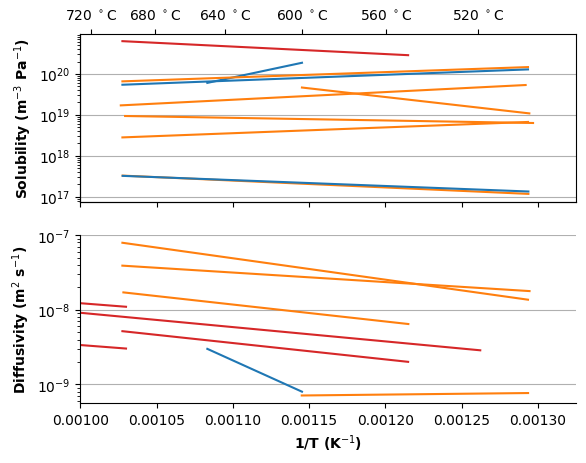

In [8]:

iso_to_colour = {
    "H": "tab:orange",
    "D": "tab:blue",
    "T": "tab:red"
}

fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True)


plt.sca(axs[0])
salt_solubilities = htm.solubilities.filter(material=["flibe", "flinak"])

for prop in salt_solubilities:
    htm.plotting.plot(prop, color=iso_to_colour[prop.isotope])
plt.yscale("log")
plt.ylabel("Solubility (m$^{-3}$ Pa$^{-1}$)", weight="bold")
plt.xlabel("")
plt.grid(axis="y")

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)


plt.sca(axs[1])

salt_diffusivities = htm.diffusivities.filter(material=["flibe", "flinak"])

for prop in salt_diffusivities:
    htm.plotting.plot(prop, color=iso_to_colour[prop.isotope])

plt.yscale("log")
plt.ylabel("Diffusivity (m$^{2}$ s$^{-1}$)", weight="bold")
plt.xlabel("1/T (K$^{-1}$)", weight="bold")
plt.grid(axis="y")

plt.gca().spines.right.set_visible(False)
plt.gca().spines.top.set_visible(False)

plt.xlim(left=0.0010)

ax_temperature = axs[0].twiny()
x1, x2 = axs[0].get_xlim()

def tick_function(X):
    V = 1000/(X)
    return ["%.0f" % z for z in V]
ax_temperature.set_xlim(axs[0].get_xlim())
import numpy as np
temperature_ticks = np.arange(720, 500, step=-40)  # C
ax_temperature.set_xticks([1/(T + 273.15) for T in temperature_ticks])
ax_temperature.set_xticklabels([f"{T:.0f} $^\circ$C" for T in temperature_ticks])
ax_temperature.figure.canvas.draw()


[None, None, None, None, None, None]

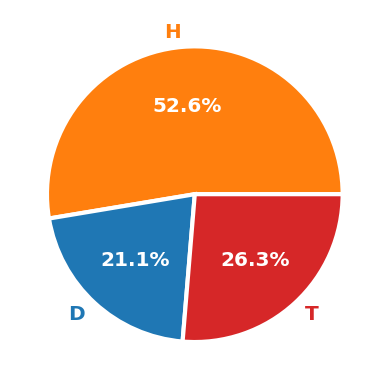

In [9]:
counters = {"H": 0, "D": 0, "T":0}
for prop in salt_diffusivities + salt_solubilities:
    counters[prop.isotope] += 1

patches, texts, pcts = plt.pie(x=counters.values(), labels=counters.keys(), colors=[iso_to_colour[iso] for iso in counters.keys()], autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.setp(pcts, color='white', fontweight='bold')
for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(texts, fontweight=600)

In [16]:
refs = []
years = []
for prop in salt_diffusivities + salt_solubilities:
    entry = f"{prop.author.capitalize()} ({prop.year})"
    if entry not in refs:
        refs.append(entry)
        years.append(prop.year)

refs = [x for _, x in sorted(zip(years, refs))]

print(", ".join(refs[::-1]))

Lam (2021), Zeng (2019), Nakamura (2015), Zeng (2014), Calderoni (2008), Fukada (2006), Anderl (2004), Oishi (1989), Malinauskas (1974), Field (1967)
